#### **This Notebook Visualises Regions of the Spectra, based on how Important they are to the Models**

In [1]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from Cleaning_and_Evaluation import *

In [2]:
df = pd.read_csv("../data/exosomes.raw_spectrum_1.csv")
#df = pd.read_csv("../data/exosomes.raw_spectrum_380-1800.csv")
#df = pd.read_csv("../data/exosomes.raw_spectrum_400-1800.csv")
#df = pd.read_csv("../data/current_clean_spectrum.csv")

In [3]:
df

,SpecID,Seq,WaveNumber,Absorbance,SurID,Status
0,201210-1-00,0,200.00000,2709.3699,201210-1,Normal
1,201210-1-00,1,200.68336,2697.1318,201210-1,Normal
2,201210-1-00,2,201.36674,2696.0413,201210-1,Normal
3,201210-1-00,3,202.05011,2678.5925,201210-1,Normal
4,201210-1-00,4,202.73349,2670.8928,201210-1,Normal
...,...,...,...,...,...,...
8023570,210526-3-09,2630,1997.26650,1321.0371,210526-3,Hyperglycemia
8023571,210526-3-09,2631,1997.94980,1316.4056,210526-3,Hyperglycemia
8023572,210526-3-09,2632,1998.63330,1311.2640,210526-3,Hyperglycemia
8023573,210526-3-09,2633,1999.31670,1318.0909,210526-3,Hyperglycemia


>Cleaning the spectra with the Grid Search Parameters

In [4]:
cleaning_params = {
    'despike': True,
    'baseline_correct': True,
    'smoothing': True,
    'scaling': False,
    'despike_ma': 10,
    'despike_threshold': 7,
    'lam': 10**9,
    'p': 0.1,
    'window_size': 51,
    'poly_order': 2
}
spectra_cleaning(df, **cleaning_params)

df

,SpecID,Seq,WaveNumber,Absorbance,SurID,Status
0,201210-1-00,0,200.00000,598.212039,201210-1,Normal
1,201210-1-00,1,200.68336,593.925013,201210-1,Normal
2,201210-1-00,2,201.36674,589.711515,201210-1,Normal
3,201210-1-00,3,202.05011,585.571544,201210-1,Normal
4,201210-1-00,4,202.73349,581.505100,201210-1,Normal
...,...,...,...,...,...,...
8023570,210526-3-09,2630,1997.26650,3.309830,210526-3,Hyperglycemia
8023571,210526-3-09,2631,1997.94980,3.783796,210526-3,Hyperglycemia
8023572,210526-3-09,2632,1998.63330,4.282653,210526-3,Hyperglycemia
8023573,210526-3-09,2633,1999.31670,4.806402,210526-3,Hyperglycemia


In [5]:
def evaluate_extra_trees(df):
    # Splitting the dataframe into features (X) and target variable (y)
    X = df.drop(['Status'], axis=1)
    y = df['Status']
    
    # Creating the Extra Trees classifier
    et = ExtraTreesClassifier(random_state=1234)
    
    # Using StratifiedKFold for classification tasks
    #cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)
    cv = KFold(n_splits=10, shuffle=True, random_state=1234)

    
    # Getting cross-validation scores
    scores = cross_val_score(et, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    
    # Displaying the results
    print(f'{et.__class__.__name__} Cross-Validation Accuracy: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')

In [6]:
wavelength_df = prepare_wavelength_df(df, 'Absorbance')
wavelength_df = wavelength_df.drop(columns='SurID')

In [7]:
wavelength_df.head()

,200.0,200.68336,201.36674,202.05011,202.73349,203.41685,204.10023,204.7836,205.46696,206.15034,...,1994.5331,1995.2164,1995.8998,1996.5831,1997.2665,1997.9498,1998.6333,1999.3167,2000.0,Status
SpecID,,,,,,,,,,,,,,,,,,,,,
201210-1-00,598.212039,593.925013,589.711515,585.571544,581.505100,577.512182,573.592792,569.746929,565.974592,562.275783,...,25.745364,25.842974,25.935833,26.023942,26.107301,26.185909,26.259768,26.328876,26.393234,Normal
201210-1-01,678.615699,671.041931,663.656528,656.459489,649.450814,642.630503,635.998556,629.554973,623.299754,617.232899,...,62.443537,63.740656,65.074050,66.443717,67.849659,69.291875,70.770366,72.285130,73.836169,Normal
201210-1-02,1026.992744,1013.123317,999.591104,986.396105,973.538320,961.017749,948.834391,936.988248,925.479318,914.307602,...,196.804592,202.536839,208.372274,214.310896,220.352705,226.497701,232.745884,239.097254,245.551811,Normal
201210-1-03,4442.363555,4514.048995,4581.949447,4646.064910,4706.395384,4762.940871,4815.701369,4864.676878,4909.867399,4951.272932,...,12.990567,13.376799,13.777588,14.192933,14.622834,15.067292,15.526307,15.999878,16.488006,Normal
201210-1-04,789.354612,784.038390,778.796138,773.627858,768.533550,763.513213,758.566847,753.694453,748.896031,744.171580,...,-9.594626,-9.194681,-8.781416,-8.354831,-7.914927,-7.461702,-6.995158,-6.515294,-6.022109,Normal


Show the performance of the current approach.

In [8]:
evaluate_extra_trees(wavelength_df)

ExtraTreesClassifier Cross-Validation Accuracy: 0.9530 +/- 0.0140


Fit an Extra Trees Classifier on the whole dataset.

In [9]:
# Splitting the dataframe into features (X) and target variable (y)
X = wavelength_df.drop(['Status'], axis=1)
y = wavelength_df['Status']

# Creating the Extra Trees classifier
et = ExtraTreesClassifier(random_state=1234)

et = ExtraTreesClassifier(random_state=1234)
et.fit(X, y)

ExtraTreesClassifier(random_state=1234)

In [10]:
feature_names = X.columns
importances = et.feature_importances_

# Creating a DataFrame from the feature names and importance
wavenumber_importance_df = pd.DataFrame({
    'WaveNumber': feature_names,
    'Importance': importances
})

wavenumber_importance_df

,WaveNumber,Importance
0,200.0,0.000934
1,200.68336,0.000982
2,201.36674,0.001183
3,202.05011,0.001003
4,202.73349,0.000751
...,...,...
2630,1997.2665,0.000403
2631,1997.9498,0.000232
2632,1998.6333,0.000380
2633,1999.3167,0.000274


In [11]:
df

,SpecID,Seq,WaveNumber,Absorbance,SurID,Status
0,201210-1-00,0,200.00000,598.212039,201210-1,Normal
1,201210-1-00,1,200.68336,593.925013,201210-1,Normal
2,201210-1-00,2,201.36674,589.711515,201210-1,Normal
3,201210-1-00,3,202.05011,585.571544,201210-1,Normal
4,201210-1-00,4,202.73349,581.505100,201210-1,Normal
...,...,...,...,...,...,...
8023570,210526-3-09,2630,1997.26650,3.309830,210526-3,Hyperglycemia
8023571,210526-3-09,2631,1997.94980,3.783796,210526-3,Hyperglycemia
8023572,210526-3-09,2632,1998.63330,4.282653,210526-3,Hyperglycemia
8023573,210526-3-09,2633,1999.31670,4.806402,210526-3,Hyperglycemia


Seaborn was using different axes so I used Matplotlib instead.

Text(0.5, 1.0, 'Feature Importance and Average Spectra of each Status')

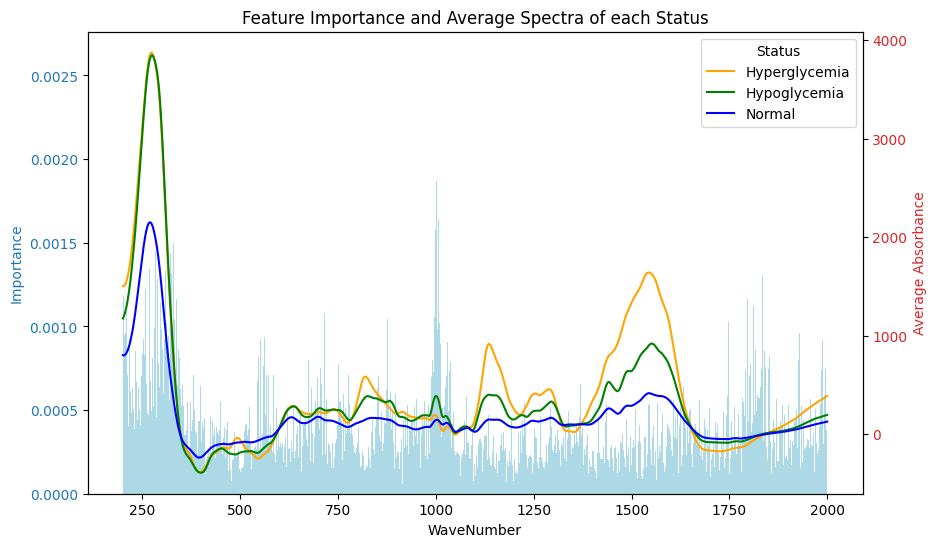

In [12]:
# Create the figure and the first (left) axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar plot on the first axis for Feature Importance
colors = ['lightblue'] * len(wavenumber_importance_df['WaveNumber'])
ax1.bar(wavenumber_importance_df['WaveNumber'], wavenumber_importance_df['Importance'], color=colors)
ax1.set_xlabel('WaveNumber')
ax1.set_ylabel('Importance', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second (right) axis, sharing the same x-axis
ax2 = ax1.twinx()

# Calculate average absorbance by WaveNumber and Status
avg_absorbance = df.groupby(['WaveNumber', 'Status'])['Absorbance'].mean().reset_index()

# Color mapping for 'Status'
color_map = {'Normal': 'blue', 'Hyperglycemia': 'orange', 'Hypoglycemia': 'green'}

# Plot average absorbance line plot on the second axis for each status
for status, group in avg_absorbance.groupby('Status'):
    ax2.plot(group['WaveNumber'], group['Absorbance'], label=status, color=color_map[status])

ax2.set_ylabel('Average Absorbance', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Adding legend for the line plots to distinguish between statuses
ax2.legend(title='Status')

# Title for the entire plot
plt.title('Feature Importance and Average Spectra of each Status')

# # Show the plot
# plt.tight_layout()
# plt.show()

---

#### **Cross-Val Importance**

Training the model on the whole dataset may be misleading, lets look at the average feature importance of each WaveNumber across the 10 folds.

In [13]:
# Splitting the dataframe into features (X) and target variable (y)
X = wavelength_df.drop(['Status'], axis=1)
y = wavelength_df['Status']

# Creating the KFold object
cv = KFold(n_splits=10, shuffle=True, random_state=1234)

# Initialising an array to store feature importances across all folds
feature_importances = np.zeros(X.shape[1])

# Looping through each split
for train_index, test_index in cv.split(X, y):
    # Splitting the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Creating and fitting the Extra Trees classifier
    et = ExtraTreesClassifier(random_state=1234)
    et.fit(X_train, y_train)
    
    # Accumulating the feature importances
    feature_importances += et.feature_importances_

# Averaging the feature importances across all folds
feature_importances /= 10

# Creating a DataFrame from the feature names and their average importance
feature_names = X.columns
wavenumber_importance_df = pd.DataFrame({
    'WaveNumber': feature_names,
    'Importance': feature_importances
})

# Optionally, you might want to sort the DataFrame based on the importances
wavenumber_importance_df = wavenumber_importance_df.sort_values(by='Importance', ascending=False)

# Displaying the DataFrame
wavenumber_importance_df

,WaveNumber,Importance
1171,1000.2278,0.002341
1170,999.54443,0.002120
1173,1001.5945,0.001999
1181,1007.0615,0.001983
1175,1002.9613,0.001979
...,...,...
1472,1205.9226,0.000139
1473,1206.606,0.000134
1438,1182.6879,0.000132
1468,1203.1891,0.000126


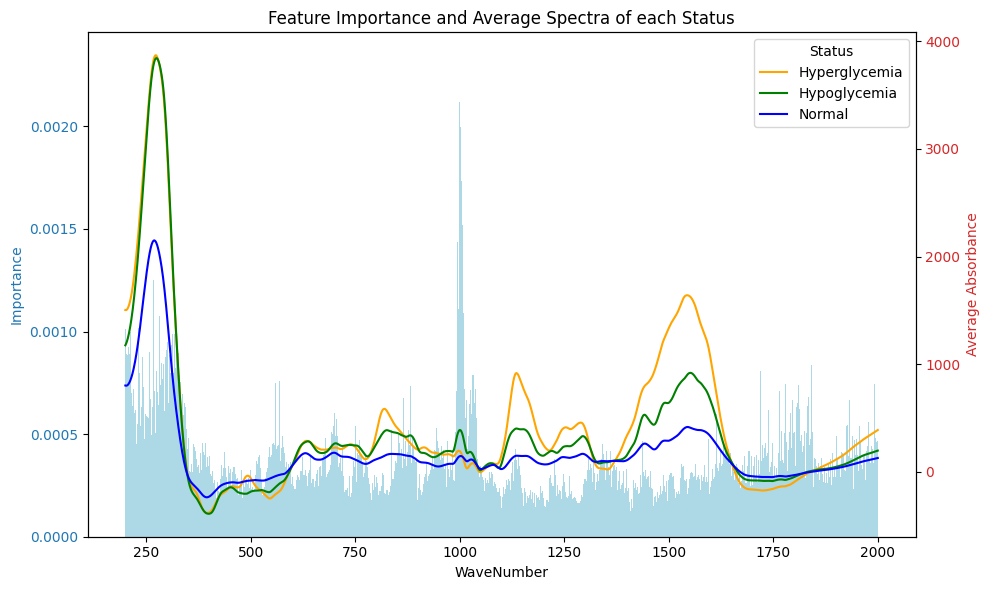

In [14]:
# Create the figure and the first (left) axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar plot on the first axis for Feature Importance
colors = ['lightblue'] * len(wavenumber_importance_df['WaveNumber'])
ax1.bar(wavenumber_importance_df['WaveNumber'], wavenumber_importance_df['Importance'], color=colors)
ax1.set_xlabel('WaveNumber')
ax1.set_ylabel('Importance', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second (right) axis, sharing the same x-axis
ax2 = ax1.twinx()

# Calculate average absorbance by WaveNumber and Status
avg_absorbance = df.groupby(['WaveNumber', 'Status'])['Absorbance'].mean().reset_index()

# Color mapping for 'Status'
color_map = {'Normal': 'blue', 'Hyperglycemia': 'orange', 'Hypoglycemia': 'green'}

# Plot average absorbance line plot on the second axis for each status
for status, group in avg_absorbance.groupby('Status'):
    ax2.plot(group['WaveNumber'], group['Absorbance'], label=status, color=color_map[status])

ax2.set_ylabel('Average Absorbance', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Adding legend for the line plots to distinguish between statuses
ax2.legend(title='Status')

# Title for the entire plot
plt.title('Feature Importance and Average Spectra of each Status')

# Show the plot
plt.tight_layout()
plt.show()